In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import nnls
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Data_Master_Sheet_byDate1.xlsx', sheet_name='Sheet1')
df.head()

,exp,sample,trt_time,orient,spectra_num,details,752.901,754.044,755.187,756.329,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,20250616,Ctrl,20mins,Orth,1,0616-Ctrl-20mins-Orth,-0.004580,0.014198,0.033234,0.052258,...,0.063764,0.060871,0.058869,0.058241,0.058690,0.060554,0.064038,0.069348,0.076688,0.086265
1,20250616,Ctrl,20mins,Orth,2,0616-Ctrl-20mins-Orth,-0.002485,0.054030,0.099156,0.134131,...,0.089793,0.091843,0.094528,0.097768,0.101272,0.104856,0.108352,0.111590,0.114402,0.116619
2,20250616,Ctrl,20mins,Orth,3,0616-Ctrl-20mins-Orth,-0.006735,0.049518,0.097465,0.137848,...,0.305150,0.310110,0.314895,0.319764,0.324469,0.329269,0.334224,0.339393,0.344836,0.350614
3,20250616,Ctrl,20mins,Orth,4,0616-Ctrl-20mins-Orth,0.016831,0.032360,0.041923,0.046839,...,0.140087,0.142750,0.144948,0.146399,0.147567,0.148977,0.150814,0.153261,0.156503,0.160724
4,20250616,Ctrl,20mins,Orth,5,0616-Ctrl-20mins-Orth,-0.002913,0.041236,0.079787,0.113092,...,0.222366,0.224526,0.226351,0.227929,0.229314,0.230770,0.232435,0.234444,0.236937,0.240051


In [19]:
dff = df[(df['orient'] == 'Orth') & (df['sample'] != 'Trt_24h')]

In [25]:
w_num = dff.columns[6:].values
spec_mat = dff.iloc[:, 6:]
sample_name = dff['sample'].tolist()
endmember = dff.groupby(['sample']).mean(numeric_only = True).reset_index().iloc[:, 3:]
ctrl_mean = dff.groupby(['sample']).mean(numeric_only = True).reset_index().iloc[0, 3:]
trt_mean = dff.groupby(['sample']).mean(numeric_only = True).reset_index().iloc[1, 3:]


In [65]:
X = dff.iloc[:, 6:].T
n_samples = X.shape[1]

coeffs = np.zeros((n_samples, 2))
fitted = np.zeros_like(X)
residuals = np.zeros_like(X)
rmse = np.zeros(n_samples)

output = []
fitt  =[]
for i in range(n_samples):
    spectrum = X.iloc[:, i]

    c, rnorm = nnls(endmember.T, spectrum)

    coeffs[i, :] = c
    fitted[:, i] = endmember.T @ c
    residuals[:, i] = spectrum - fitted[:, i]
    rmse[i] = np.sqrt(np.mean(residuals[:, i] ** 2))

    out = {
        'coeff0': c[0],
        'coeff1': c[1],
        'resdidual': rnorm
    }
    fits = c[0] * ctrl_mean + c[1] *trt_mean
    output.append(out)
    fitt.append(fits)


In [58]:
nnls_out = pd.DataFrame(output)
nnls_out

,coeff0,coeff1,resdidual
0,0.995583,0.000000,2.060134
1,0.947791,0.000000,1.138332
2,0.000000,1.074992,2.916041
3,0.494554,0.498777,1.727431
4,0.000000,1.025599,5.114112
...,...,...,...
310,0.000000,1.078142,3.872136
311,0.000000,1.140338,5.233654
312,0.000000,1.217923,3.887524
313,0.000000,0.978871,3.350258


In [74]:
df.iloc[:, :6]

,exp,sample,trt_time,orient,spectra_num,details
0,20250616,Ctrl,20mins,Orth,1,0616-Ctrl-20mins-Orth
1,20250616,Ctrl,20mins,Orth,2,0616-Ctrl-20mins-Orth
2,20250616,Ctrl,20mins,Orth,3,0616-Ctrl-20mins-Orth
3,20250616,Ctrl,20mins,Orth,4,0616-Ctrl-20mins-Orth
4,20250616,Ctrl,20mins,Orth,5,0616-Ctrl-20mins-Orth
...,...,...,...,...,...,...
873,20250609,Trt,60mins,Para,5,0609-Trt-60mins-Para
874,20250609,Trt,60mins,Para,7,0609-Trt-60mins-Para
875,20250609,Trt,60mins,Para,9,0609-Trt-60mins-Para
876,20250609,Trt,60mins,Para,11,0609-Trt-60mins-Para


In [80]:
fitted_df = pd.concat([dff.iloc[:, :6].reset_index(drop=True),pd.DataFrame(fitt)], axis=1)

In [91]:
df_mean1 = fitted_df.groupby(['sample', 'trt_time']).mean(numeric_only=True).reset_index()

In [92]:
df_mean1

,sample,trt_time,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,758.613,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,20mins,2.025055e+07,4.900000,0.017502,0.044775,0.069171,0.090857,0.110000,0.126770,...,0.155028,0.156372,0.157523,0.158504,0.159330,0.160042,0.160675,0.161250,0.161790,0.162315
1,Ctrl,24h,2.025056e+07,4.774194,0.018160,0.046047,0.070984,0.093145,0.112705,0.129839,...,0.165633,0.166924,0.167974,0.168815,0.169464,0.169981,0.170426,0.170833,0.171238,0.171677
2,Ctrl,2mins,2.025056e+07,7.181818,0.017226,0.044452,0.068811,0.090469,0.109591,0.126343,...,0.148196,0.149615,0.150880,0.152008,0.153013,0.153918,0.154737,0.155479,0.156152,0.156766
3,Ctrl,40mins,2.025055e+07,5.166667,0.018129,0.046065,0.071047,0.093249,0.112846,0.130013,...,0.164243,0.165556,0.166638,0.167518,0.168215,0.168782,0.169275,0.169725,0.170166,0.170629
4,Ctrl,60mins,2.025056e+07,5.161290,0.018143,0.045901,0.070721,0.092776,0.112243,0.129294,...,0.166645,0.167909,0.168923,0.169719,0.170317,0.170779,0.171170,0.171530,0.171897,0.172310
5,Trt,20mins,2.025056e+07,4.774194,0.018781,0.047577,0.073326,0.096208,0.116404,0.134094,...,0.171809,0.173133,0.174203,0.175054,0.175703,0.176214,0.176650,0.177051,0.177453,0.177896
6,Trt,24h,2.025056e+07,5.457143,0.019361,0.048783,0.075087,0.098458,0.119084,0.137151,...,0.180142,0.181440,0.182452,0.183217,0.183754,0.184140,0.184454,0.184746,0.185063,0.185452
7,Trt,2mins,2.025056e+07,4.937500,0.017453,0.044761,0.069189,0.090904,0.110075,0.126869,...,0.153349,0.154716,0.155902,0.156926,0.157805,0.158573,0.159261,0.159884,0.160463,0.161015
8,Trt,40mins,2.025056e+07,4.774194,0.018727,0.047328,0.072900,0.095624,0.115679,0.133246,...,0.172607,0.173899,0.174927,0.175727,0.176319,0.176768,0.177145,0.177493,0.177852,0.178265
9,Trt,60mins,2.025056e+07,4.774194,0.018958,0.047936,0.073847,0.096871,0.117192,0.134992,...,0.174443,0.175757,0.176807,0.177628,0.178239,0.178707,0.179102,0.179466,0.179839,0.180263


In [104]:
ctm = df_mean1.groupby(['sample']).mean(numeric_only=True).reset_index()
ctm.insert(1, 'trt_time', '0min')
ctm

,sample,trt_time,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,758.613,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,0min,2.025056e+07,5.436794,0.017832,0.045448,0.070147,0.092099,0.111477,0.128452,...,0.159949,0.161275,0.162387,0.163313,0.164068,0.164701,0.165257,0.165763,0.166249,0.166739
1,Trt,0min,2.025056e+07,4.943445,0.018656,0.047277,0.072870,0.095613,0.115687,0.133270,...,0.170470,0.171789,0.172858,0.173710,0.174364,0.174880,0.175323,0.175728,0.176134,0.176578


In [113]:
df_mean1.iloc[5:, :].reset_index()

,index,sample,trt_time,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,5,Trt,20mins,2.025056e+07,4.774194,0.018781,0.047577,0.073326,0.096208,0.116404,...,0.171809,0.173133,0.174203,0.175054,0.175703,0.176214,0.176650,0.177051,0.177453,0.177896
1,6,Trt,24h,2.025056e+07,5.457143,0.019361,0.048783,0.075087,0.098458,0.119084,...,0.180142,0.181440,0.182452,0.183217,0.183754,0.184140,0.184454,0.184746,0.185063,0.185452
2,7,Trt,2mins,2.025056e+07,4.937500,0.017453,0.044761,0.069189,0.090904,0.110075,...,0.153349,0.154716,0.155902,0.156926,0.157805,0.158573,0.159261,0.159884,0.160463,0.161015
3,8,Trt,40mins,2.025056e+07,4.774194,0.018727,0.047328,0.072900,0.095624,0.115679,...,0.172607,0.173899,0.174927,0.175727,0.176319,0.176768,0.177145,0.177493,0.177852,0.178265
4,9,Trt,60mins,2.025056e+07,4.774194,0.018958,0.047936,0.073847,0.096871,0.117192,...,0.174443,0.175757,0.176807,0.177628,0.178239,0.178707,0.179102,0.179466,0.179839,0.180263


In [112]:
pd.concat([ctm.iloc[0, :], df_mean1.iloc[5:, :]], axis=0, ignore_index=True)

,0,sample,trt_time,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20250555.088328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.436794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.017832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,NaN,Trt,20mins,2.025056e+07,4.774194,0.018781,0.047577,0.073326,0.096208,0.116404,...,0.171809,0.173133,0.174203,0.175054,0.175703,0.176214,0.176650,0.177051,0.177453,0.177896
981,NaN,Trt,24h,2.025056e+07,5.457143,0.019361,0.048783,0.075087,0.098458,0.119084,...,0.180142,0.181440,0.182452,0.183217,0.183754,0.184140,0.184454,0.184746,0.185063,0.185452
982,NaN,Trt,2mins,2.025056e+07,4.937500,0.017453,0.044761,0.069189,0.090904,0.110075,...,0.153349,0.154716,0.155902,0.156926,0.157805,0.158573,0.159261,0.159884,0.160463,0.161015
983,NaN,Trt,40mins,2.025056e+07,4.774194,0.018727,0.047328,0.072900,0.095624,0.115679,...,0.172607,0.173899,0.174927,0.175727,0.176319,0.176768,0.177145,0.177493,0.177852,0.178265


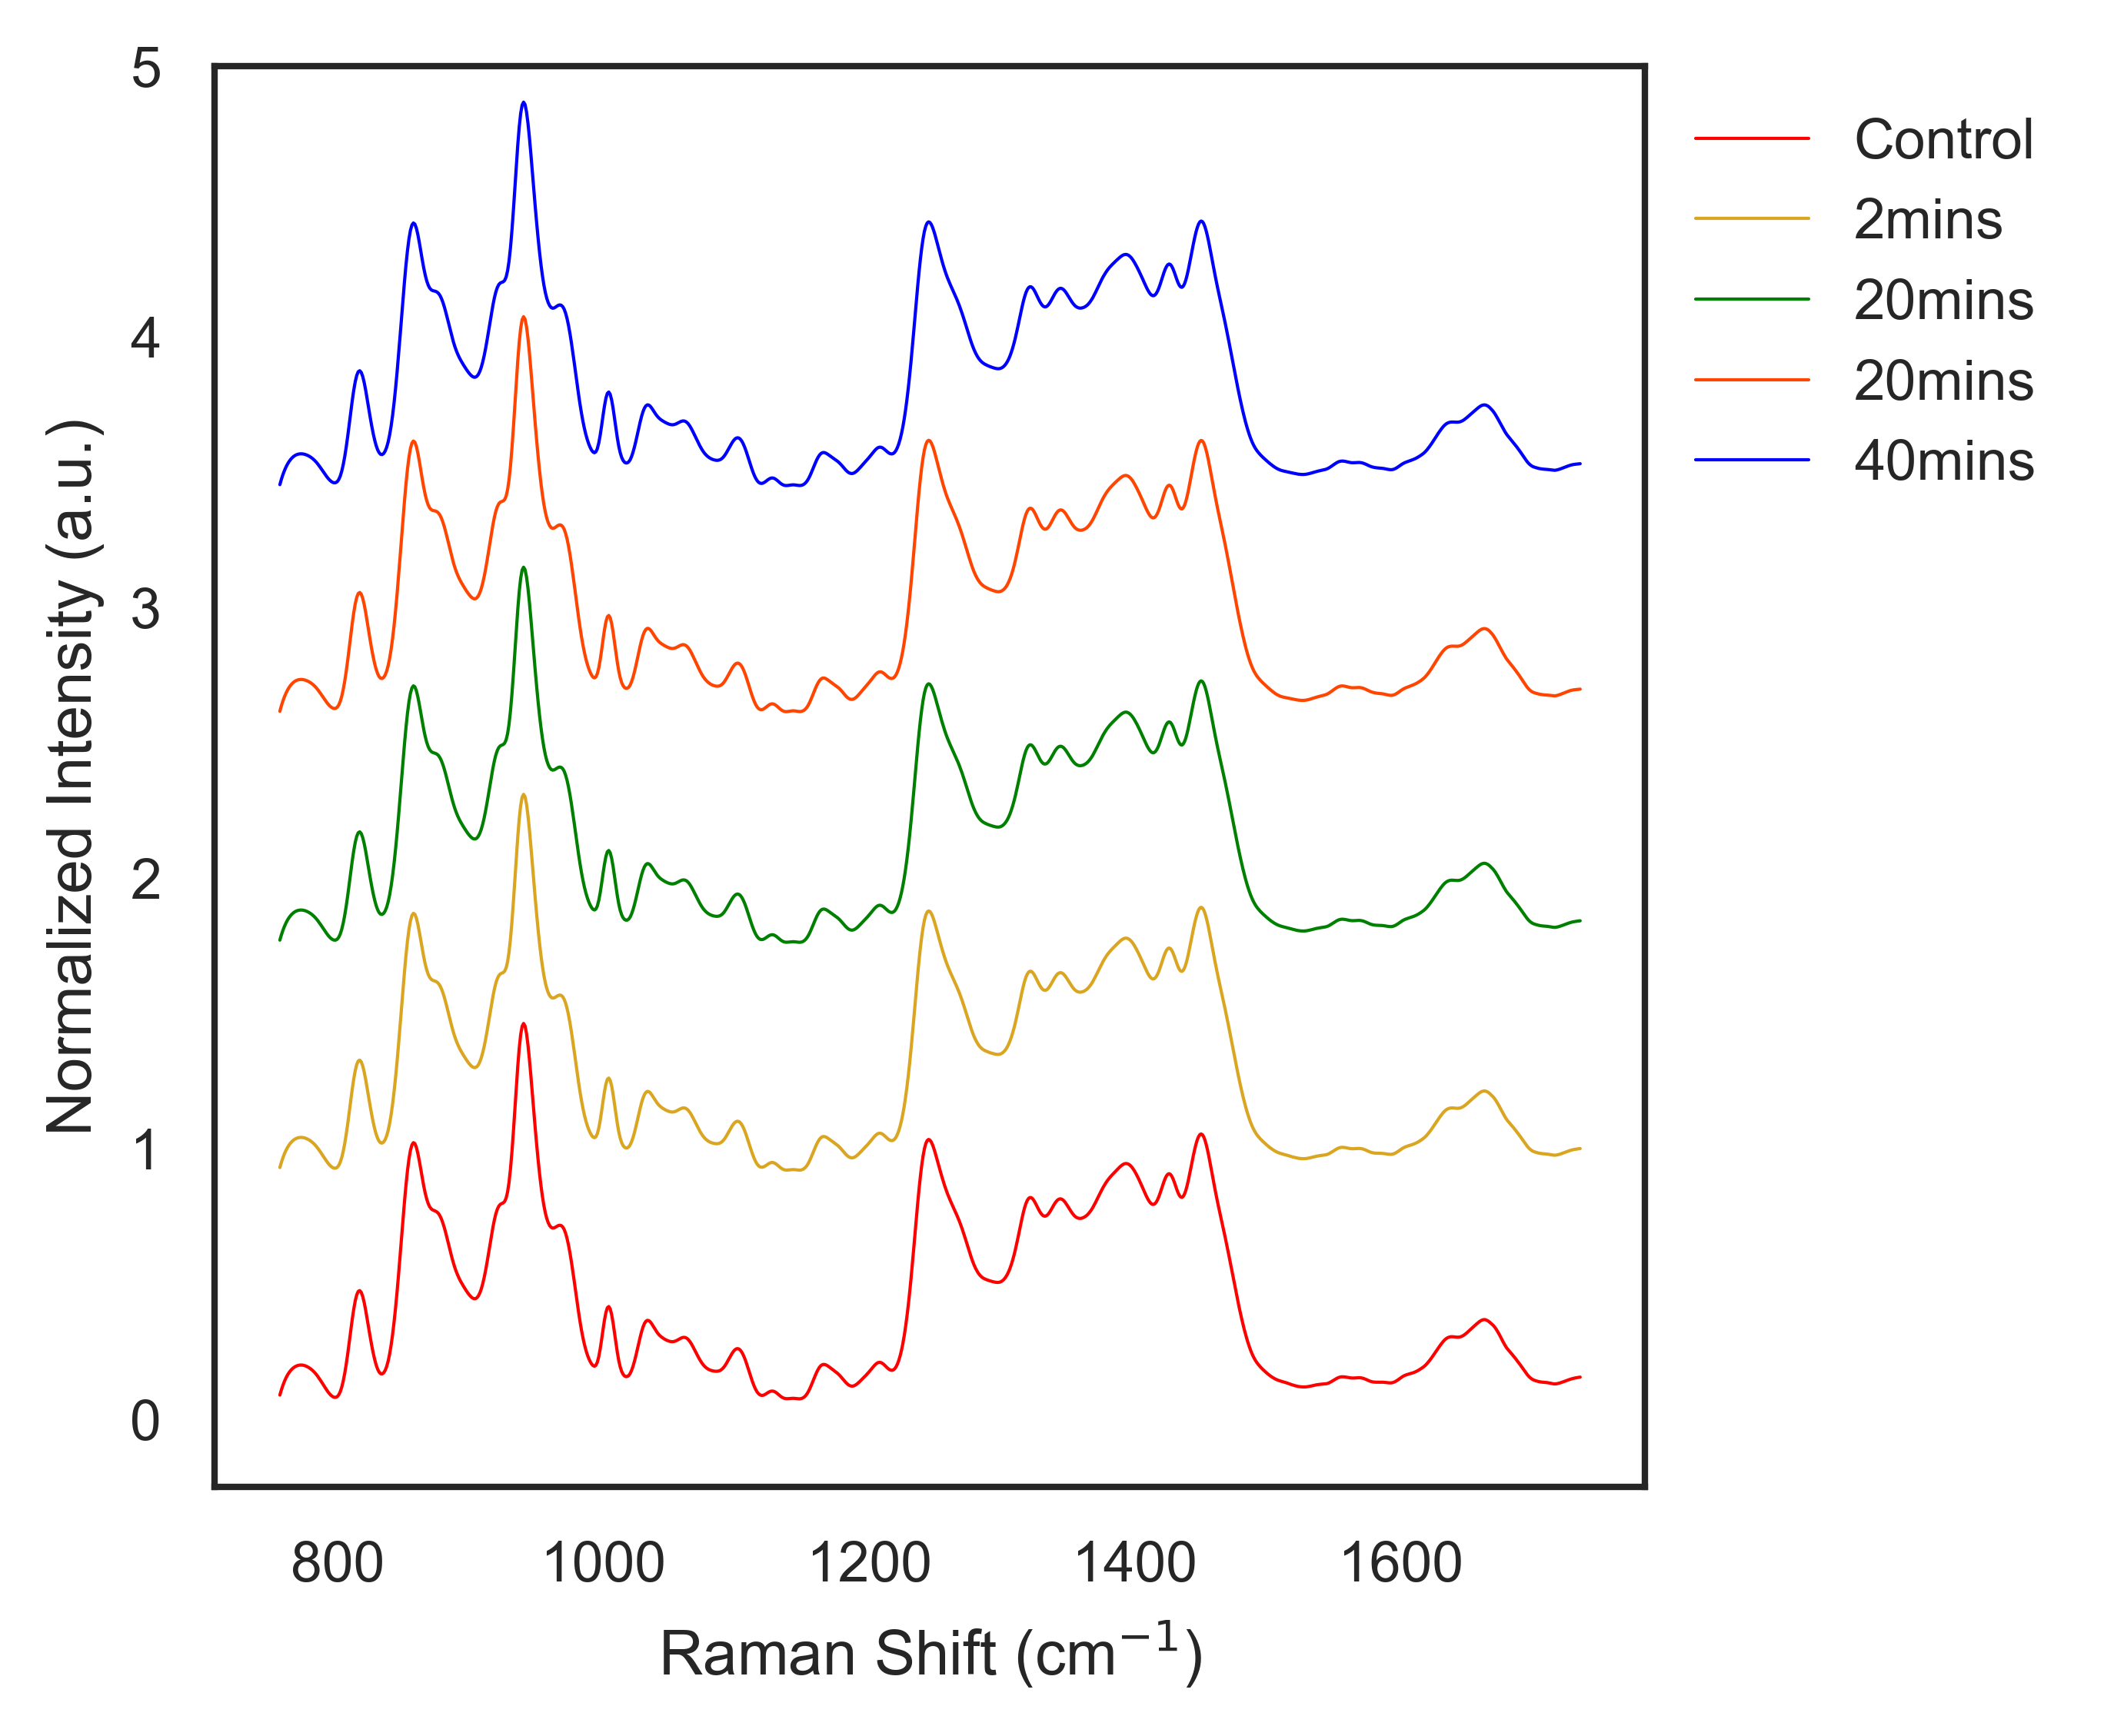

In [93]:
### Diference from singular control

sns.set_theme(style = 'white', context = 'paper')
col_map = ['orange', 'goldenrod','green', 'orangered', 'blue', 'k']
#for i in ['2mins', '20mins', '40mins', '60mins']:#, '24h'
for j in ['Orth']:#, 'Para', 'Orth'
    sub = df_mean1.drop(['exp', 'spectra_num'], axis=1)
    sub['trt_time'] = pd.Categorical(sub['trt_time'], categories= ['0mins',   '2mins',  '20mins',     '40mins',    '60mins',  '24h'])
    sub = sub.sort_values('trt_time').reset_index(drop=True)
    #sub_ctrl = sub[(sub['sample'] == 'Ctrl') & (sub['orient'] == j)]
    #diff = sub.iloc[1:, 5:].values - sub.iloc[0, 5:].values

    plt.figure(figsize = (4, 4), dpi = 600)
    sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = sub.iloc[0, 5:].values,
            label = 'Control',
            color = 'red',
            lw = .5
        )
    for b in range(1, 5):
        #plt.figure(figsize = (6, 4), dpi = 300)
        '''if b == 3:
            sns.lineplot(
                x = sub.columns[5:].astype(float),
                y = sub.iloc[b, 5:] + 2, #.values +.35,
                label = sub['trt_time'][b],
                color = col_map[b],
                lw = .5,
                #hue = 'trt_time'
            #palette=col_map
            )
        else:'''
        sns.lineplot(
                x = sub.columns[5:].astype(float),
                y = sub.iloc[b, 5:] +(b/1.19), #.values +.35,
                label = sub['trt_time'][b],
                color = col_map[b],
                lw = .5,
                #hue = 'trt_time'
            #palette=col_map
            )
        
    
    
    '''sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = diff,
            label = 'Difference',
            color = 'blue',
            lw = 1
        )'''
        #plt.title(f'Raman spectra for {j} samples at {i} treatment time')
    plt.legend(bbox_to_anchor = (1, 1), frameon = False)
    plt.xlabel("Raman Shift (cm$^{-1}$)")
    plt.ylabel("Normalized Intensity (a.u.)")
    plt.ylim(-.25, 5)
    #plt.axhline(0, lw = .5, color = 'black')